In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [91]:
df = pd.read_csv('new_insurance_data.csv')

In [92]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [93]:
df.dtypes

age                                float64
sex                                 object
bmi                                float64
children                           float64
smoker                              object
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                              object
charges                            float64
dtype: object

In [94]:
df.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

### Filling missing values with median for numerical columns

In [95]:
df.select_dtypes(include= ['float'])

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,1121.87390
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,1131.50660
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,1135.94070
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,1136.39940
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,1137.01100
...,...,...,...,...,...,...,...,...,...,...
1333,33.0,35.530,0.0,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,55135.40209
1334,31.0,38.095,1.0,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,58571.07448
1335,52.0,34.485,3.0,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,60021.39897
1336,45.0,30.360,0.0,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,62592.87309


In [96]:
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(), inplace= True)

In [97]:
df.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

#### Converting some float data type columns to int like age , no. of children

In [98]:
# this type of conversion is used when data type of the oclumn is object but it convert numerical 
# here error  ='coerce' , convert invalid or non numeric data in that column to nan


df['age'] = pd.to_numeric(df['age'] ,errors= 'coerce')
df['children'] = pd.to_numeric(df['children'] ,errors= 'coerce')


In [99]:
df.dtypes

age                                float64
sex                                 object
bmi                                float64
children                           float64
smoker                              object
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                              object
charges                            float64
dtype: object

In [100]:
df['age'] = df['age'].astype(int)
df['children'] = df['children'].astype(int)
df.dtypes

age                                  int32
sex                                 object
bmi                                float64
children                             int32
smoker                              object
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                              object
charges                            float64
dtype: object

In [101]:
df.rename( columns = {'Anual_Salary': 'Annual_Salary'}, inplace=True)

# For safety purpose
df_copy = df.copy()

#### Exploratory analysis using  histogram and boxplot

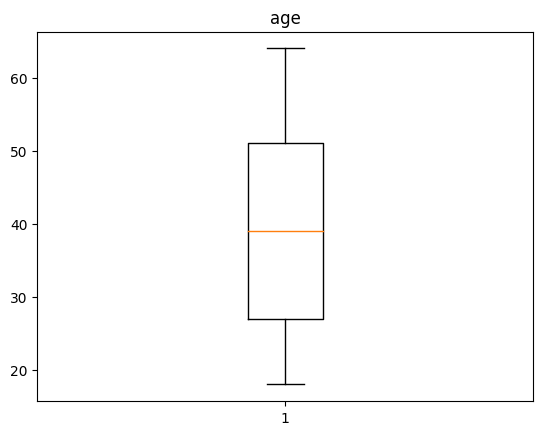

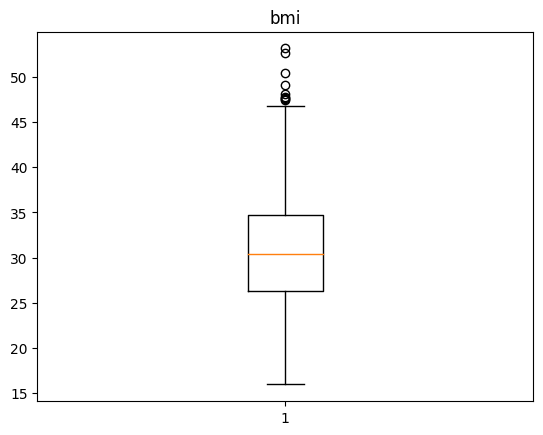

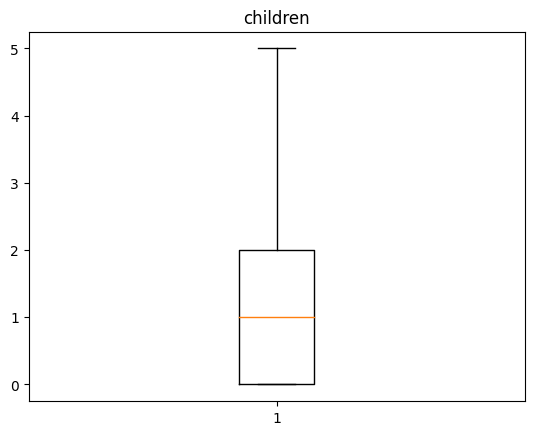

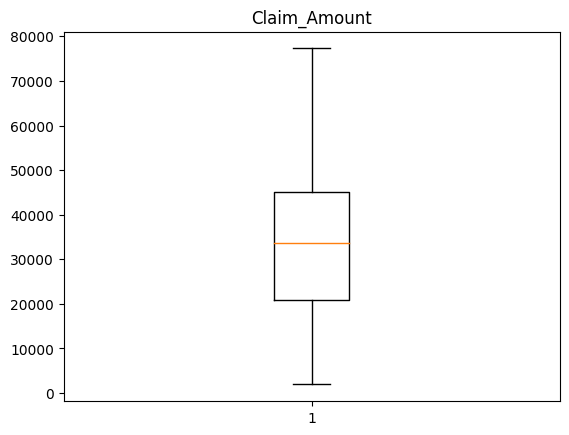

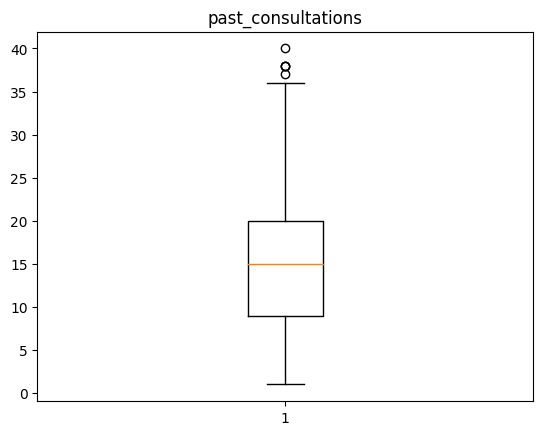

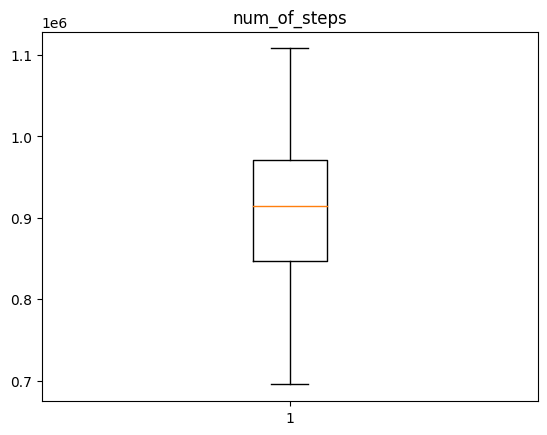

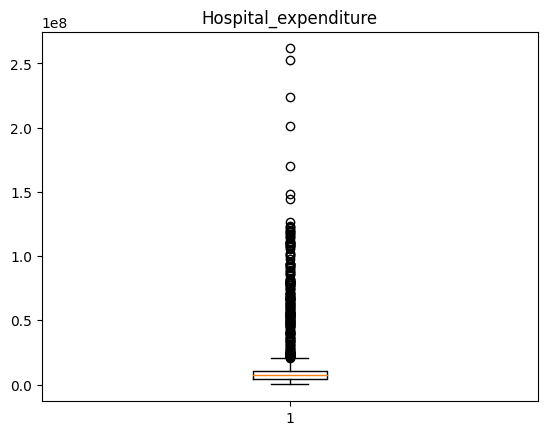

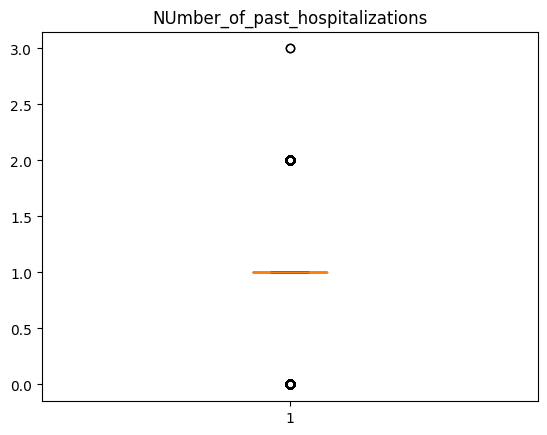

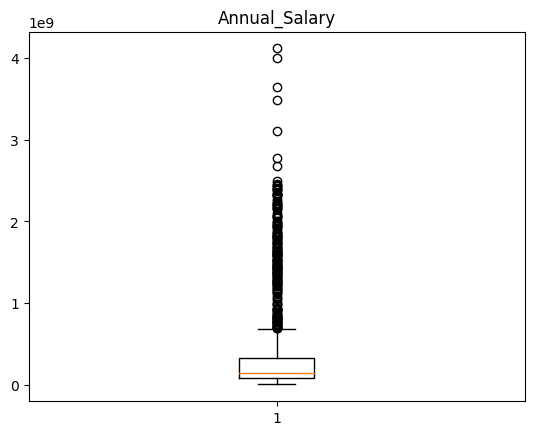

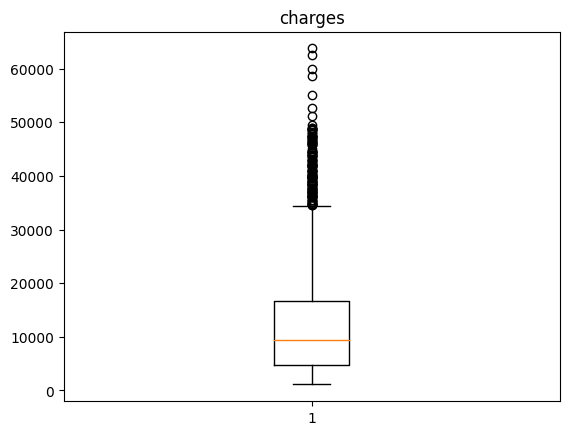

In [102]:
for col in df.columns:
    if df[col].dtypes == int  or df[col].dtypes == float:
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()
        
 

<AxesSubplot:>

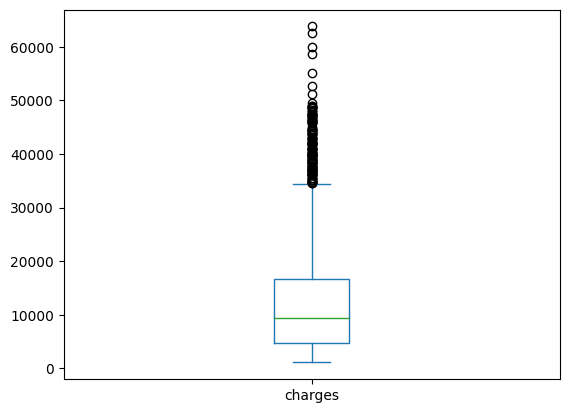

In [103]:
df['charges'].plot(kind = 'box')

In [104]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:ylabel='Frequency'>

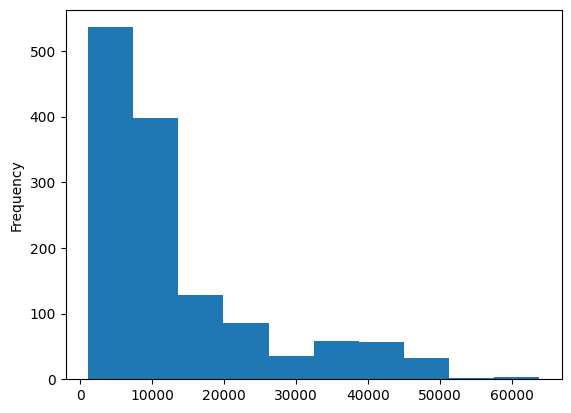

In [105]:
df['charges'].plot(kind = 'hist')

##### Checking the number of outliers

In [106]:
outlier = []

iqr =  df['charges'].quantile(0.75) - df['charges'].quantile(0.25)
whisker_1 = df['charges'].quantile(0.25) - 1.5*iqr
whisker_2 = df['charges'].quantile(0.75) + 1.5*iqr

In [107]:
for values in df['charges']:
    if values > whisker_2 or values < whisker_1:
        outlier.append(values)

In [108]:
len(outlier)/len(df['charges'])

# 10 percent of the data is outlier so we cannot drop these outliers

0.1038863976083707

In [109]:
outlier = []

iqr =  df['Annual_Salary'].quantile(0.75) - df['Annual_Salary'].quantile(0.25)
whisker_1 = df['Annual_Salary'].quantile(0.25) - 1.5*iqr
whisker_2 = df['Annual_Salary'].quantile(0.75) + 1.5*iqr

for values in df['Annual_Salary']:
    if values > whisker_2 or values < whisker_1:
        outlier.append(values)

In [110]:
len(outlier)/len(df['Annual_Salary'])

0.14723467862481315

### Model building without encoding categorical variables to numericals

In [111]:
parameters  = df.drop(columns = ['sex', 'smoker','region',  'charges'])

In [112]:
parameters

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Annual_Salary
0,18,23.210,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18,30.140,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18,33.330,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18,33.660,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18,34.100,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1333,33,35.530,0,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09
1334,31,38.095,1,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09
1335,52,34.485,3,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09
1336,45,30.360,0,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09


In [113]:
target = df['charges']
target

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1333    55135.40209
1334    58571.07448
1335    60021.39897
1336    62592.87309
1337    63770.42801
Name: charges, Length: 1338, dtype: float64

In [114]:
model = LinearRegression()


In [115]:
x_train, x_test, y_train, y_test = train_test_split(parameters, target, test_size= 0.2, random_state= 46)

In [116]:
model.fit(x_train, y_train)

LinearRegression()

In [117]:
print('training score is', model.score(x_train, y_train))
print('testing score is', model.score(x_test, y_test))

training score is 0.9910879431656401
testing score is 0.9016197158269338


##### Building model after converting categorical to encoded columns

In [118]:
encoded_df = pd.get_dummies(df[['sex', 'smoker', 'region' ]])

In [119]:
encoded_df.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,1,0,0,0,1,0
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,0,1,0
4,0,1,1,0,0,0,1,0


In [120]:
df_with_encoded = pd.concat([df, encoded_df] ,axis = 1)


In [121]:
df_with_encoded.drop(columns = ['sex', 'smoker', 'region'], inplace = True)

In [122]:
df_with_encoded.head()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Annual_Salary,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,18,23.21,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,1121.8739,0,1,1,0,0,0,1,0
1,18,30.14,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,1131.5066,0,1,1,0,0,0,1,0
2,18,33.33,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,1135.9407,0,1,1,0,0,0,1,0
3,18,33.66,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,1136.3994,0,1,1,0,0,0,1,0
4,18,34.10,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,1137.0110,0,1,1,0,0,0,1,0


In [123]:
parameters_encoded = df_with_encoded.drop(columns= 'charges')
target_encoded = df['charges']


parameters_encoded.head()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Annual_Salary,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,18,23.21,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,0,1,1,0,0,0,1,0
1,18,30.14,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,0,1,1,0,0,0,1,0
2,18,33.33,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,0,1,1,0,0,0,1,0
3,18,33.66,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,0,1,1,0,0,0,1,0
4,18,34.10,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,0,1,1,0,0,0,1,0


In [124]:
x_train_encoded, x_test_encoded, y_train_encoded, y_test_encoded = train_test_split(parameters_encoded, target_encoded, test_size= 0.2, random_state= 98)

In [125]:
model_encoded = LinearRegression()
model_encoded.fit(x_train_encoded, y_train_encoded)

LinearRegression()

In [126]:
print('training score is', model_encoded.score(x_train_encoded, y_train_encoded))
print('testing score is', model_encoded.score(x_test_encoded, y_test_encoded))

training score is 0.9851515242822936
testing score is 0.9655017235535367


In [127]:
# we found that by using encoded columns for sex, smoker, region our score increased
#  whereas these columns were dropped in the first approach while model building

### Model building using VIF analysis

In [128]:
df_copy.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Annual_Salary,region,charges
0,18,male,23.21,0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18,male,30.14,0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18,male,33.33,0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18,male,33.66,0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18,male,34.10,0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [129]:
col_list = []

for col in df_copy.columns:
    if (df[col].dtypes != 'object')  and (col != 'charges'):
        col_list.append(col)

In [130]:
# smoker, sex , region and charges column excluded for VIF analysis
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Annual_Salary']

In [131]:
df_copy = df_copy[col_list]

In [132]:
vif_data  =pd.DataFrame()

In [133]:
vif_data['features'] = df_copy.columns

In [134]:
vif_data['vif values'] = [variance_inflation_factor(df_copy.values, i) for i in range(len(df_copy.columns))]

In [135]:
vif_data

,features,vif values
0,age,11.965156
1,bmi,25.995936
2,children,1.947603
3,Claim_Amount,6.916927
4,past_consultations,8.333491
5,num_of_steps,60.066549
6,Hospital_expenditure,17.696701
7,NUmber_of_past_hospitalizations,15.863415
8,Annual_Salary,23.617984


In [136]:
# droping one by one the column with maximum VIF values until vif for each remaining columns gets lower than 6

df_copy = df_copy.drop(columns = ['num_of_steps'])

In [137]:
df_copy.head()

,age,bmi,children,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Annual_Salary
0,18,23.21,0,29087.54313,17.0,4720920.992,0.0,55784970.05
1,18,30.14,0,39053.67437,7.0,4329831.676,0.0,13700885.19
2,18,33.33,0,39023.62759,19.0,6884860.774,0.0,73523107.27
3,18,33.66,0,28185.39332,11.0,4274773.550,0.0,75819679.60
4,18,34.10,0,14697.85941,16.0,3787293.921,0.0,23012320.01


In [138]:
vif_data  =pd.DataFrame()
vif_data['features'] = df_copy.columns
vif_data['vif values'] = [variance_inflation_factor(df_copy.values, i) for i in range(len(df_copy.columns))]

In [139]:
vif_data

,features,vif values
0,age,10.151158
1,bmi,11.688356
2,children,1.931368
3,Claim_Amount,6.375028
4,past_consultations,7.536986
5,Hospital_expenditure,17.571109
6,NUmber_of_past_hospitalizations,13.750606
7,Annual_Salary,23.592163


In [140]:
# droping one by one the column with maximum VIF values until vif for each remaining columns gets lower than 6

df_copy = df_copy.drop(columns = ['Annual_Salary'])

In [141]:
vif_data  =pd.DataFrame()
vif_data['features'] = df_copy.columns
vif_data['vif values'] = [variance_inflation_factor(df_copy.values, i) for i in range(len(df_copy.columns))]
vif_data

,features,vif values
0,age,9.909001
1,bmi,11.145846
2,children,1.917639
3,Claim_Amount,6.362642
4,past_consultations,7.338140
5,Hospital_expenditure,2.546587
6,NUmber_of_past_hospitalizations,11.048809


In [142]:
# droping one by one the column with maximum VIF values until vif for each remaining columns gets lower than 6

df_copy = df_copy.drop(columns = ['bmi'])

In [143]:
vif_data  =pd.DataFrame()
vif_data['features'] = df_copy.columns
vif_data['vif values'] = [variance_inflation_factor(df_copy.values, i) for i in range(len(df_copy.columns))]
vif_data

,features,vif values
0,age,7.508435
1,children,1.890687
2,Claim_Amount,5.660365
3,past_consultations,6.708699
4,Hospital_expenditure,2.515995
5,NUmber_of_past_hospitalizations,11.029632


In [144]:
# droping one by one the column with maximum VIF values until vif for each remaining columns gets lower than 6

df_copy = df_copy.drop(columns = ['NUmber_of_past_hospitalizations'])

In [145]:
vif_data  =pd.DataFrame()
vif_data['features'] = df_copy.columns
vif_data['vif values'] = [variance_inflation_factor(df_copy.values, i) for i in range(len(df_copy.columns))]
vif_data

,features,vif values
0,age,5.809884
1,children,1.783669
2,Claim_Amount,5.349778
3,past_consultations,6.290878
4,Hospital_expenditure,1.886956


In [146]:
#### now its acceptable
df_copy.head()

,age,children,Claim_Amount,past_consultations,Hospital_expenditure
0,18,0,29087.54313,17.0,4720920.992
1,18,0,39053.67437,7.0,4329831.676
2,18,0,39023.62759,19.0,6884860.774
3,18,0,28185.39332,11.0,4274773.550
4,18,0,14697.85941,16.0,3787293.921


In [147]:
parameters_vif = df_copy
target_vif =target_encoded ### using previous target column because no change in it

In [148]:
parameters_vif

,age,children,Claim_Amount,past_consultations,Hospital_expenditure
0,18,0,29087.54313,17.0,4.720921e+06
1,18,0,39053.67437,7.0,4.329832e+06
2,18,0,39023.62759,19.0,6.884861e+06
3,18,0,28185.39332,11.0,4.274774e+06
4,18,0,14697.85941,16.0,3.787294e+06
...,...,...,...,...,...
1333,33,0,63142.25346,32.0,1.703805e+08
1334,31,1,43419.95227,31.0,2.015152e+08
1335,52,3,52458.92353,25.0,2.236450e+08
1336,45,0,69927.51664,34.0,2.528924e+08


In [149]:
target

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1333    55135.40209
1334    58571.07448
1335    60021.39897
1336    62592.87309
1337    63770.42801
Name: charges, Length: 1338, dtype: float64

In [150]:
model_vif = LinearRegression()

In [151]:
x_train_vif, x_test_vif, y_train_vif, y_test_vif = train_test_split(parameters_vif, target_vif, test_size= 0.2, random_state= 54)

In [152]:
model_vif.fit(x_train_vif, y_train_vif)

LinearRegression()

In [153]:
print('training score is', model_vif.score(x_train_vif, y_train_vif))
print('testing score is', model_vif.score(x_test_vif, y_test_vif))

training score is 0.838442215645675
testing score is 0.7739277239013742


### though VIF analysis reduce  collinearity and complexity of the model but maximum score was found in 2 nd case 
### when we considered encoded variable also for model building